# COIL-20 dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)
%load_ext autoreload
%autoreload 1
%aimport zero_shot_active_learning

data = pd.read_csv("../../../Datasets/COIL-20/coil20.csv").dropna()
y = data.pop('1025').values.astype(int)
X = data.values
X = normalize(X, norm='max',axis=0)
np.unique(y, return_counts=True)

/home/lasa/.conda/envs/topo/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 array([72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72,
        72, 72, 72]))

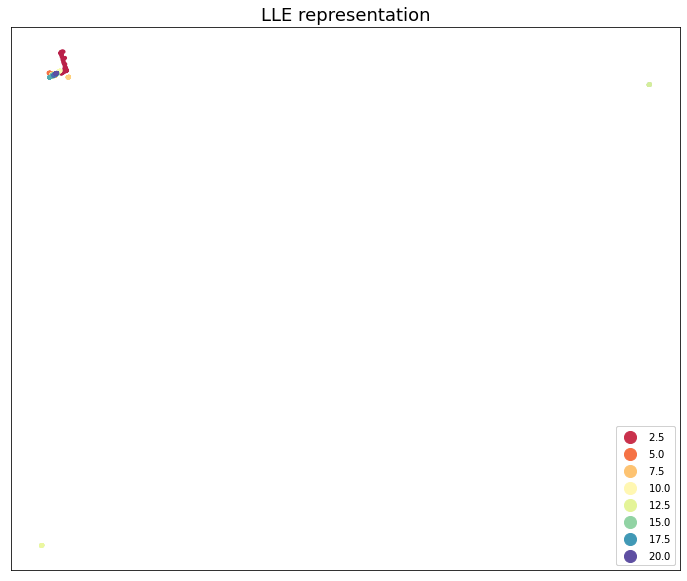

In [2]:
import umap
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

embedding = LocallyLinearEmbedding(n_components=2)
#embedding = umap.UMAP(random_state=2020)
X_transformed = embedding.fit_transform(X)

fig, ax = plt.subplots(figsize=(12, 10))
scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap="Spectral", s=10)
plt.setp(ax, xticks=[], yticks=[])
plt.title("LLE representation", fontsize=18)
legend2 = ax.legend(*scatter.legend_elements(), loc="lower right", prop={'size': 10} , markerscale=2.)
ax.add_artist(legend2)
plt.show()

## Save 20 random split pre-computed data

In [2]:
from sklearn.neighbors import NearestNeighbors
from data_gen import *

ids_train = Datasets.load_obj('coil20_train')
ids_test = Datasets.load_obj('coil20_test')
dists_ = []
idxs_ = []
density_ = []
for i in range(20):
    num_pts = X[ids_train[i],:].shape[0]
    nbrs = NearestNeighbors(n_neighbors=int(num_pts / 10), n_jobs=-1).fit(X[ids_train[i],:])
    dist_, idx_ = nbrs.kneighbors()
    idxs_.append(idx_)
    density_.append(1/np.sqrt(np.mean(np.square(dist_), axis=1)))
    dists_.append(dist_)

In [6]:
ids_train = Datasets.load_obj('coil20_train')
ids_test = Datasets.load_obj('coil20_test')

In [11]:
from data_gen import *
Datasets.save_obj(ids_train, 'coil20_train')
Datasets.save_obj(ids_test, 'coil20_test')

###### split  0  ######
max occurence for density:  3.9410878259283644
min :  1.4082039562147115  max :  5.304948371158792


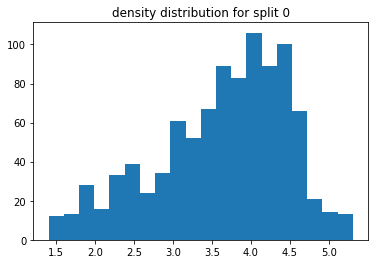

###### split  1  ######
max occurence for density:  3.88600386367091
min :  1.414146773035708  max :  5.217003835551403


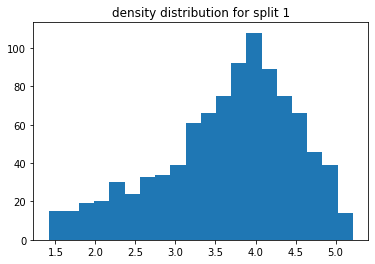

###### split  2  ######
max occurence for density:  3.889618748865889
min :  1.4072101626986389  max :  5.544557806310722


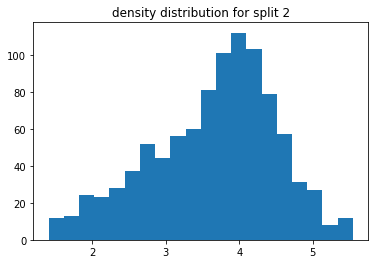

###### split  3  ######
max occurence for density:  3.7069418609940072
min :  1.4275832746224963  max :  5.226514251908347


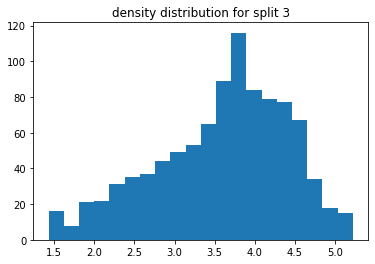

###### split  4  ######
max occurence for density:  4.378936047911958
min :  1.3872822627687458  max :  5.661073384401908


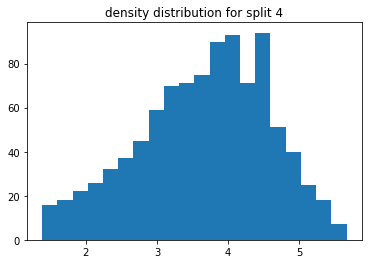

In [3]:
import numpy as np
import matplotlib.pyplot as plt

density = np.load('../../obj/banknote_density.npz')['density']

for i in range(5):
    print('###### split ',i,' ######')
    #bin, h, _ = plt.hist(np.average(dists_[i], axis=1),bins=20)
    #print('max occurence for distance: ', h[np.argmax(bin)])
    #print('min : ', np.min(dists_[i]), ' max : ', np.max(dists_[i]))
    #plt.title('distance distribution for split '+str(i))
    #plt.show()
    bin, h, _ = plt.hist(density[i], bins=20)
    print('max occurence for density: ', h[np.argmax(bin)])
    print('min : ', np.min(density[i]), ' max : ', np.max(density[i]))
    plt.title('density distribution for split '+str(i))
    plt.show()



###### split  0  ######
max occurence for distance:  7.369270430066176
min :  0.1785913368456947  max :  12.74660631783767


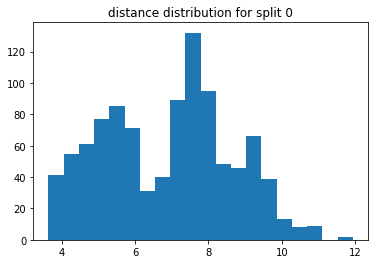

max occurence for density:  0.12154018860167466
min :  0.08352849724038601  max :  0.2355752626855406


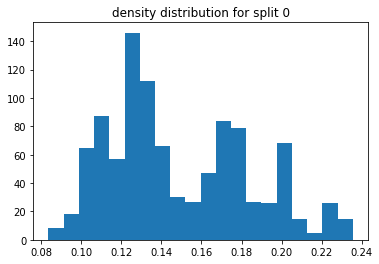

###### split  1  ######
max occurence for distance:  7.358634388911926
min :  0.21121165483740573  max :  12.678361146247486


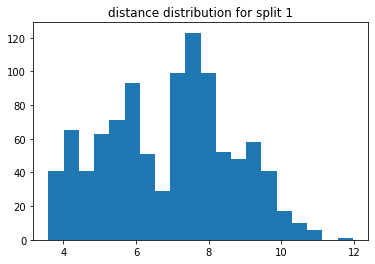

max occurence for density:  0.12203556322987105
min :  0.08345404654392566  max :  0.2377801132877072


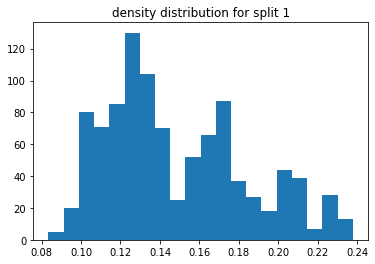

###### split  2  ######
max occurence for distance:  7.7136831185836074
min :  0.1785913368456947  max :  12.700808675188016


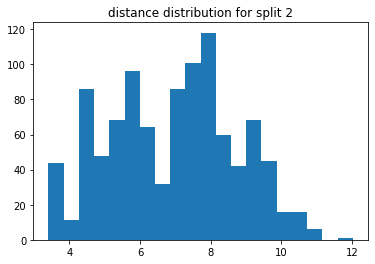

max occurence for density:  0.12413842333635516
min :  0.08306231646029122  max :  0.247366743964547


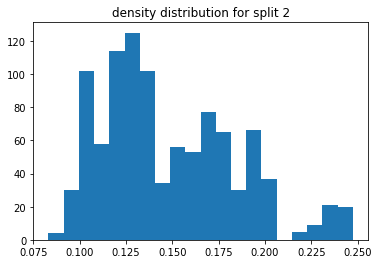

###### split  3  ######
max occurence for distance:  7.728181674372047
min :  0.1785913368456947  max :  12.785039359093918


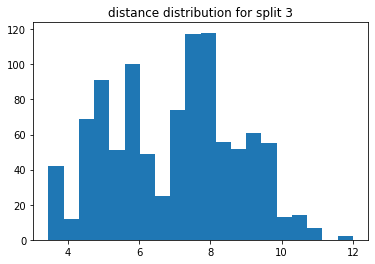

max occurence for density:  0.12349536718444619
min :  0.08309735845428264  max :  0.24468939337493686


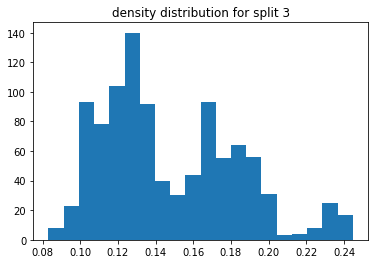

###### split  4  ######
max occurence for distance:  7.5442317661228415
min :  0.18943579094801305  max :  12.710381394796041


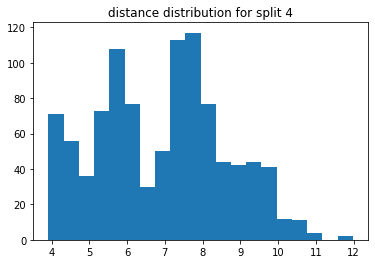

max occurence for density:  0.12377127304301208
min :  0.08327632816950035  max :  0.2182594777478728


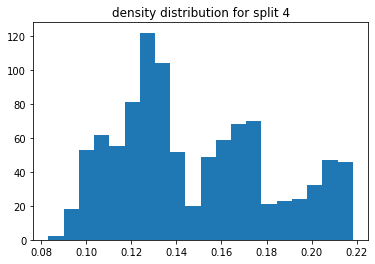

In [8]:
import matplotlib.pyplot as plt

for i in range(5):
    print('###### split ',i,' ######')
    bin, h, _ = plt.hist(np.average(dists_[i], axis=1),bins=20)
    print('max occurence for distance: ', h[np.argmax(bin)])
    print('min : ', np.min(dists_[i]), ' max : ', np.max(dists_[i]))
    plt.title('distance distribution for split '+str(i))
    plt.show()
    bin, h, _ = plt.hist(density_[i], bins=20)
    print('max occurence for density: ', h[np.argmax(bin)])
    print('min : ', np.min(density_[i]), ' max : ', np.max(density_[i]))
    plt.title('density distribution for split '+str(i))
    plt.show()

# Sample importance with loo loss

In [4]:
import data_gen
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier

loo = LeaveOneOut()
scores = []
for train_index, test_index in loo.split(X):
    X_train, y_train = X[train_index], y[train_index]
    clf = SGDClassifier(random_state=2020)
    scores.append(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))
Datasets.save_obj(scores, 'coil20_scores')

# Rank score

In [7]:
from zero_shot_active_learning import BMeans
from zero_shot_active_learning import TCAL 
import numpy as np

rank = np.argsort(scores)
for k in [10, 50, 100]:
    acc_s = []
    acc_t = []
    acc_r = []
    for i in range(20):
        acc_r.append(np.mean(rank[ids_train[i]][:k]))
        m = BMeans(n_clusters=k, rank=rank[ids_train[i]], verbose=False)
        m.fit(X[ids_train[i],:], y[ids_train[i]])
        acc_s.append(m.rank_score())
        
        t = TCAL(rad=23, y=y[ids_train[i]], m=.09, n_clusters=k, rank=rank[ids_train[i]],
                density=density_[i], dist=dists_[i], idx=idxs_[i])
        t.fit(X[ids_train[i],:])
        acc_t.append(t.rank_score())
    print('## -- Budget k = ', k)
    print('BMeans : mean=%.5f' % np.mean(acc_s))
    print('TCAL : mean=%.5f' % np.mean(acc_t))
    print('Random : mean=%.5f' % np.mean(acc_r))

## -- Budget k =  10
BMeans : mean=746.61500
TCAL : mean=652.93500
Random : mean=703.34500
## -- Budget k =  50
BMeans : mean=680.35700
TCAL : mean=742.63100
Random : mean=716.27300
## -- Budget k =  100
BMeans : mean=691.13050
TCAL : mean=744.74750
Random : mean=718.29700


# Active learning

In [8]:
from sklearn.ensemble import RandomForestClassifier
from modAL.uncertainty import uncertainty_sampling
from modAL.models import ActiveLearner

def Agent(X_train, y_train, X_pool, y_pool):
    N_QUERIES = min(20, len(y_pool))
    
    learner = ActiveLearner(estimator=RandomForestClassifier(random_state=2020, n_jobs=-1), 
                            query_strategy=uncertainty_sampling, X_training=X_train, y_training=y_train)
    for index in range(N_QUERIES):
        query_index, query_instance = learner.query(X_pool)
        
        # Teach our ActiveLearner model the record it has requested.
        X, y = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
        learner.teach(X=X, y=y)
        
        # Remove the queried instance from the unlabeled pool.
        X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)
        
    return learner

In [10]:
from zero_shot_active_learning import TCAL

for k in [5]:
    acc_r = []
    acc_t = []
    for i in range(20):
        
        # TCAL
        t = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                            y=y[ids_train[i]], m=.09, rad=23, n_clusters=k)
        train_x, train_y = t.fit(X[ids_train[i],:])
        X_pool, y_pool = X[ids_train[i],][t.labels_ == -1], y[ids_train[i]][t.labels_ == -1] 
        clf = Agent(train_x, train_y, X_pool, y_pool)
        acc_t.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
        
        # Random set classif
        X_pool, y_pool = X[ids_train[i],:][k:,], y[ids_train[i]][k:]
        clf = Agent(X[ids_train[i],:][:k,], y[ids_train[i]][:k], X_pool, y_pool)
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
        
    print('## -- Budget k = ', k)
    print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))
    print('TCAL : mean=%.5f, std=%.5f' % (np.mean(acc_t), np.std(acc_t)))

## -- Budget k =  5
Random : mean=0.50671, std=0.04091
TCAL : mean=0.41285, std=0.03154


# Classif results

# Bmeans

In [11]:
from zero_shot_active_learning import BMeans
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np

for k in [10, 50, 100]:
    acc_r = []
    acc_b = []
    acc_s = []
    for r in range(20):
        m = BMeans(n_clusters=k, verbose=False)
        m.fit(X[ids_train[r],:], y[ids_train[r]])
        train_x = X[ids_train[r],:][m.labels_ != -1,]
        train_y = m.labels_[m.labels_ != -1]
        
        # Bmeans set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_b.append(clf.score(X[ids_test[r],:], y[ids_test[r]]))
        
        # Seed set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(m.seed[0], m.seed[1])
        acc_s.append(clf.score(X[ids_test[r],:], y[ids_test[r]]))
        
        # Random set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[r],:][:k,], y[ids_train[r]][:k])
        acc_r.append((clf.score(X[ids_test[r],:], y[ids_test[r]])))
    print('## -- Budget k = ', k)
    print('BMeans : mean=%.5f, std=%.5f' % (np.mean(acc_b), np.std(acc_b)))
    print('Seed set : mean=%.5f, std=%.5f' % (np.mean(acc_s), np.std(acc_s)))
    print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

## -- Budget k =  10
BMeans : mean=0.38137, std=0.02603
Seed set : mean=0.32755, std=0.03574
Random : mean=0.23484, std=0.04790
## -- Budget k =  50
BMeans : mean=0.82361, std=0.01704
Seed set : mean=0.71215, std=0.04152
Random : mean=0.59722, std=0.04319
## -- Budget k =  100
BMeans : mean=0.86447, std=0.02059
Seed set : mean=0.81181, std=0.03689
Random : mean=0.74757, std=0.03870


In [4]:
from zero_shot_active_learning import BMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np

for k in [10, 50, 100]:
    acc_r = []
    acc_b = []
    acc_s = []
    for r in range(20):
        m = BMeans(n_clusters=k, verbose=False)
        m.fit(X[ids_train[r],:], y[ids_train[r]])
        train_x = X[ids_train[r],:][m.labels_ != -1,]
        train_y = m.labels_[m.labels_ != -1]
        
        # Bmeans set classif
        clf = RandomForestClassifier(random_state=2020, n_jobs=-1)
        clf.fit(train_x, train_y)
        acc_b.append(clf.score(X[ids_test[r],:], y[ids_test[r]]))
        
        # Seed set classif
        clf = RandomForestClassifier(random_state=2020, n_jobs=-1)
        clf.fit(m.seed[0], m.seed[1])
        acc_s.append(clf.score(X[ids_test[r],:], y[ids_test[r]]))
        
        # Random set classif
        clf = RandomForestClassifier(random_state=2020, n_jobs=-1)
        clf.fit(X[ids_train[r],:][:k,], y[ids_train[r]][:k])
        acc_r.append((clf.score(X[ids_test[r],:], y[ids_test[r]])))
    print('## -- Budget k = ', k)
    print('BMeans : mean=%.5f, std=%.5f' % (np.mean(acc_b), np.std(acc_b)))
    print('Seed set : mean=%.5f, std=%.5f' % (np.mean(acc_s), np.std(acc_s)))
    print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

## -- Budget k =  10
BMeans : mean=0.38275, std=0.02513
Seed set : mean=0.36134, std=0.03723
Random : mean=0.27106, std=0.04932
## -- Budget k =  50
BMeans : mean=0.82847, std=0.01502
Seed set : mean=0.77176, std=0.03250
Random : mean=0.66933, std=0.04910
## -- Budget k =  100
BMeans : mean=0.87454, std=0.01373
Seed set : mean=0.87477, std=0.01211
Random : mean=0.82662, std=0.04417


# Intersection

In [6]:
from zero_shot_active_learning import BMeans
from zero_shot_active_learning import TCAL 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import numpy as np

for k in [10, 50, 100]:
    acc_tcal = []
    acc_bmeans = []
    for i in range(20):
        b = BMeans(n_clusters=k, verbose=False)
        b.fit(X[ids_train[i],:], y[ids_train[i]])
        t = TCAL(rad=23, y=y[ids_train[i]], m=.09, n_clusters=k, 
                 density=density_[i], dist=dists_[i], idx=idxs_[i])
        _, train_y = t.fit(X[ids_train[i],:])
        acc_tcal.append(accuracy_score(y[ids_train[i]][t.labels_ != -1], train_y))
        acc_bmeans.append(accuracy_score(y[ids_train[i]][t.labels_ != -1], b.labels_[t.labels_ != -1]))
    print('## -- Budget k = ', k)
    print('BMeans accuracy on intersection: mean=%.5f, std=%.5f' % (np.mean(acc_bmeans), np.std(acc_bmeans)))
    print('TCAL accuracy on intersection : mean=%.5f, std=%.5f' % (np.mean(acc_tcal), np.std(acc_tcal)))

## -- Budget k =  10
BMeans accuracy on intersection: mean=0.53979, std=0.09781
TCAL accuracy on intersection : mean=0.99879, std=0.00528
## -- Budget k =  50
BMeans accuracy on intersection: mean=0.91313, std=0.01731
TCAL accuracy on intersection : mean=0.99063, std=0.00646
## -- Budget k =  100
BMeans accuracy on intersection: mean=0.90864, std=0.01039
TCAL accuracy on intersection : mean=0.99068, std=0.00492


# TCAL

In [5]:
from zero_shot_active_learning import TCAL 
from sklearn import linear_model
import numpy as np

for k in [10, 50, 100]:
    acc_r = []
    acc_t = []
    acc_p = []
    acc_s = []

    for i in range(20):
        m = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                            y=y[ids_train[i]], m=.09, rad=23, n_clusters=k)
        train_x, train_y =  m.fit(X[ids_train[i],:])
        
        # TCAL set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_t.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
        
        # TCAL+PROP set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:], m.model.predict(X[ids_train[i],:]))
        acc_p.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))

        # Seed set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(m.seed[0], m.seed[1])
        acc_s.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))

        # Random set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:k,], y[ids_train[i]][:k])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    print('## -- Budget k = ', k)
    print('TCAL : mean=%.5f, std=%.5f' % (np.mean(acc_t), np.std(acc_t)))
    print('TCAL+PROP : mean=%.5f, std=%.5f' % (np.mean(acc_p), np.std(acc_p)))
    print('Seed set : mean=%.5f, std=%.5f' % (np.mean(acc_s), np.std(acc_s)))
    print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normal

## -- Budget k =  10
TCAL : mean=0.43519, std=0.03252
TCAL+PROP : mean=0.44676, std=0.03346
Seed set : mean=0.36620, std=0.03566
Random : mean=0.23484, std=0.04790


/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normal

## -- Budget k =  50
TCAL : mean=0.86296, std=0.02436
TCAL+PROP : mean=0.86713, std=0.02640
Seed set : mean=0.69028, std=0.03980
Random : mean=0.59722, std=0.04319


/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normal

## -- Budget k =  100
TCAL : mean=0.95937, std=0.01177
TCAL+PROP : mean=0.94271, std=0.01509
Seed set : mean=0.83102, std=0.03737
Random : mean=0.74757, std=0.03870


## -- tau estimated

In [18]:
from zero_shot_active_learning import TCAL 
from sklearn import linear_model

for k in [10, 50, 100]:
    acc_r = []
    acc_t = []
    acc_s = []

    for i in range(20):
        m = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                            y=y[ids_train[i]], m=.09, rad=23, n_clusters=k)
        train_x, train_y = m.fit(X[ids_train[i],:])

        # TCAL set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_t.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))

        # Seed set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(m.seed[0], m.seed[1])
        acc_s.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))

        # Random set classif
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:k,], y[ids_train[i]][:k])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    print('## -- Budget k = ', k)
    print('TCAL : mean=%.5f, std=%.5f' % (np.mean(acc_t), np.std(acc_t)))
    print('Seed set : mean=%.5f, std=%.5f' % (np.mean(acc_s), np.std(acc_s)))
    print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

## -- Budget k =  10
TCAL : mean=0.43519, std=0.03252
Seed set : mean=0.36620, std=0.03566
Random : mean=0.23484, std=0.04790
## -- Budget k =  50
TCAL : mean=0.86296, std=0.02436
Seed set : mean=0.69028, std=0.03980
Random : mean=0.59722, std=0.04319
## -- Budget k =  100
TCAL : mean=0.95937, std=0.01177
Seed set : mean=0.83102, std=0.03737
Random : mean=0.74757, std=0.03870


In [6]:
from zero_shot_active_learning import TCAL 
from sklearn.ensemble import RandomForestClassifier

for k in [10, 50, 100]:
    acc_r = []
    acc_t = []
    acc_s = []

    for i in range(20):
        m = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                            y=y[ids_train[i]], m=.09, rad=23, n_clusters=k)
        train_x, train_y = m.fit(X[ids_train[i],:])

        # TCAL set classif
        clf = RandomForestClassifier(random_state=2020, n_jobs=-1)
        clf.fit(train_x, train_y)
        acc_t.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))

        # Seed set classif
        acc_s.append(m.model.score(X[ids_test[i],:], y[ids_test[i]]))

        # Random set classif
        clf = RandomForestClassifier(random_state=2020, n_jobs=-1)
        clf.fit(X[ids_train[i],:][:k,], y[ids_train[i]][:k])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    print('## -- Budget k = ', k)
    print('TCAL : mean=%.5f, std=%.5f' % (np.mean(acc_t), np.std(acc_t)))
    print('Seed set : mean=%.5f, std=%.5f' % (np.mean(acc_s), np.std(acc_s)))
    print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normal

## -- Budget k =  10
TCAL : mean=0.44653, std=0.03141
Seed set : mean=0.45220, std=0.03119
Random : mean=0.27106, std=0.04932


/Users/lies/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/semi_supervised/_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


## -- Budget k =  50
TCAL : mean=0.90706, std=0.02794
Seed set : mean=0.85880, std=0.01763
Random : mean=0.66933, std=0.04910
## -- Budget k =  100
TCAL : mean=0.97627, std=0.01024
Seed set : mean=0.89873, std=0.01449
Random : mean=0.82662, std=0.04417


## -- Budget = 10 with tau our estimation

In [3]:
from sklearn.metrics import accuracy_score
from zero_shot_active_learning import TCAL 
from sklearn import linear_model
import metrics

acc_r = []
acc_o = []
for i in range(20):
    print(('########### split ',i,' ###########'))
    clst = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                        y=y[ids_train[i]], m=.09, rad=23, n_clusters=10)
    if clst.fit(X[ids_train[i],:]):
        continue
    unique, counts = np.unique(clst.labels_, return_counts=True)
    print(unique, counts)
    print('Isolated points : ', np.sum(counts ==1))
    for c in unique[counts > 4]:
        msq = np.isin(clst.labels_, [c])
        acc = np.round(metrics.acc(y[ids_train[i]][msq], clst.labels_[msq]), 5)
        print('** class ', clst.labels_[msq][0],' : acc=%.5f' % (acc))
    train_x = X[ids_train[i],:][clst.labels_ != -1,]
    train_y = clst.labels_[clst.labels_ != -1]
    if len(np.unique(train_y)) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
    else:
        acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
    if len(np.unique(y[ids_train[i]][:clst.n_clusters])) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:clst.n_clusters,], y[ids_train[i]][:clst.n_clusters])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    else:
        acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
print(acc_o)
print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
print(acc_r)
print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

('########### split ', 0, ' ###########')
Computing underlying rips graph :  0.037477833000000516 seconds
Computing persistence :  0.014070006999997275 seconds
[-1  4 10 11 12 13 14 15 16 20] [774  26  26  26  26  26  26  26  26  26]
Isolated points :  0
** class  -1  : acc=0.07235
** class  4  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  20  : acc=1.00000
('########### split ', 1, ' ###########')
Computing underlying rips graph :  0.033118246000000795 seconds
Computing persistence :  0.017098441999998215 seconds
[-1  4 12 13 14 15 16 17 20] [832  22  22  22  22  22  22  22  22]
Isolated points :  0
** class  -1  : acc=0.06971
** class  4  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.0

[-1 10 11 12 13 14 15 16 17 20] [783  25  25  25  25  25  25  25  25  25]
Isolated points :  0
** class  -1  : acc=0.07024
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  20  : acc=1.00000
('########### split ', 16, ' ###########')
Computing underlying rips graph :  0.03465936399999947 seconds
Computing persistence :  0.015681046000000975 seconds
[-1  7  8 10 12 13 14 15 16 20] [801  23  23  23  23  23  23  23  23  23]
Isolated points :  0
** class  -1  : acc=0.06991
** class  7  : acc=1.00000
** class  8  : acc=0.73913
** class  10  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  20  : acc=1.00000
('########### split ', 17, ' ###########')
Computing underlying rips graph :  0.032436434000

## -- Budget = 50, tau=0

In [11]:
from sklearn.metrics import accuracy_score
from fuzzy_clustering import Fuzzy_ToMATo 
from sklearn import linear_model
import metrics

for rad in [23]:
    for m in [0.09]:
        for b in [1]:
            acc_r = []
            acc_o = []
            print('########### run r=', rad,' m=' , m,' bais=', b, ' ###########')
            for i in range(20):
                print(('########### split ',i,' ###########'))
                mnist_clst = Fuzzy_ToMATo(density=density_[i], dist=dists_[i], idx=idxs_[i], tau=0, y=y[ids_train[i]], m = m, bais=b, rad=rad, n_clusters=50)
                if mnist_clst.fit(X[ids_train[i],:]):
                    continue
                unique, counts = np.unique(mnist_clst.labels_, return_counts=True)
                print(unique)
                print(counts)
                print('Isolated points : ', np.sum(counts ==1))
                for c in unique[counts > 4]:
                    msq = np.isin(mnist_clst.labels_, [c])
                    acc = np.round(metrics.acc(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    nmi = np.round(metrics.nmi(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    ari = np.round(metrics.ari(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    print('** class ',mnist_clst.labels_[msq][0],' : acc=%.5f, nmi=%.5f, ari=%.5f' % (acc, nmi, ari))
                train_x = X[ids_train[i],:][mnist_clst.labels_ != -1,]
                train_y = mnist_clst.labels_[mnist_clst.labels_ != -1]
                if len(np.unique(train_y)) > 1:
                    clf = linear_model.SGDClassifier(random_state=2020)
                    clf.fit(train_x, train_y)
                    acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
                else:
                    acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
                if len(np.unique(y[ids_train[i]][:mnist_clst.n_clusters])) > 1:
                    clf = linear_model.SGDClassifier(random_state=2020)
                    clf.fit(X[ids_train[i],:][:mnist_clst.n_clusters,], y[ids_train[i]][:mnist_clst.n_clusters])
                    acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
                else:
                    acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
            print(acc_o)
            print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
            print(acc_r)
            print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

########### run r= 23  m= 0.09  bais= 1  ###########
('########### split ', 0, ' ###########')
Computing underlying neighborhood graph :  0.04791536300012922 seconds
Sorting points by density :  0.0005500629999914963 seconds
MERGES :  0
B_max :  136
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[728  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14
  14  14  14]
Isolated points :  0
** class  -1  : acc=0.06044, nmi=-0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  8  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  9  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.000

('########### split ', 6, ' ###########')
Computing underlying neighborhood graph :  0.04520270599982723 seconds
Sorting points by density :  0.0007776830000238988 seconds
MERGES :  0
B_max :  135
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[868   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
   7   7   7]
Isolated points :  0
** class  -1  : acc=0.05530, nmi=0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  8  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  9  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1.000

** class  17  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  18  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  19  : acc=0.77778, nmi=0.00000, ari=0.00000
** class  20  : acc=1.00000, nmi=1.00000, ari=1.00000
('########### split ', 12, ' ###########')
Computing underlying neighborhood graph :  0.05671992400016279 seconds
Sorting points by density :  0.0005677110000306129 seconds
MERGES :  0
B_max :  131
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[828   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
   9   9   9]
Isolated points :  0
** class  -1  : acc=0.05435, nmi=-0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1

** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  12  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  13  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  14  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  15  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  16  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  17  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  18  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  19  : acc=0.88889, nmi=-0.00000, ari=0.00000
** class  20  : acc=1.00000, nmi=1.00000, ari=1.00000
('########### split ', 18, ' ###########')
Computing underlying neighborhood graph :  0.041078995000134455 seconds
Sorting points by density :  0.0007858599999508442 seconds
MERGES :  0
B_max :  138
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[708  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15  15
  15  15  15]
Isolated points :  0
** class  -1 

## -- Budget = 50 with tau  tomato estimation

In [5]:
from sklearn.metrics import accuracy_score
from zero_shot_active_learning import TCAL 
from sklearn import linear_model
import metrics

acc_r = []
acc_o = []
for i in range(20):
    print(('########### split ',i,' ###########'))
    clst = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                        y=y[ids_train[i]], m=.09, rad=23, n_clusters=50)
    if clst.fit(X[ids_train[i],:]):
        continue
    unique, counts = np.unique(clst.labels_, return_counts=True)
    print(unique, counts)
    print('Isolated points : ', np.sum(counts ==1))
    for c in unique[counts > 4]:
        msq = np.isin(clst.labels_, [c])
        acc = np.round(metrics.acc(y[ids_train[i]][msq], clst.labels_[msq]), 5)
        print('** class ', clst.labels_[msq][0],' : acc=%.5f' % (acc))
    train_x = X[ids_train[i],:][clst.labels_ != -1,]
    train_y = clst.labels_[clst.labels_ != -1]
    if len(np.unique(train_y)) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
    else:
        acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
    if len(np.unique(y[ids_train[i]][:clst.n_clusters])) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:clst.n_clusters,], y[ids_train[i]][:clst.n_clusters])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    else:
        acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
print(acc_o)
print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
print(acc_r)
print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

('########### split ', 0, ' ###########')
Computing underlying neighborhood graph :  0.05450253900005464 seconds
Sorting points by density :  0.0005919879999964905 seconds
Computing persistence :  0.015329211999983272 seconds
MERGES :  78
B_max :  70
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [248  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
  38  38  38]
Isolated points :  0
** class  -1  : acc=0.08871
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=0.97368
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.71053
** cl

B_max :  67
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [308  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35
  35  35  35]
Isolated points :  0
** class  -1  : acc=0.08766
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=0.80000
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.88571
** class  20  : acc=1.00000
('########### split ', 9, ' ###########')
Computing underlying neighborhood graph :  0.0536734660000775 seconds
Sorting points by density :  0.0005015270000967575 seconds
Computing persistence :  0.01697367100007341 

('########### split ', 17, ' ###########')
Computing underlying neighborhood graph :  0.049630864999926416 seconds
Sorting points by density :  0.000592855000036252 seconds
Computing persistence :  0.016193514999940817 seconds
MERGES :  69
B_max :  87
main clusters :  50
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [308  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35
  35  35  35]
Isolated points :  0
** class  -1  : acc=0.08117
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.94286
** c

## -- Budget = 50 with tau our estimation

In [4]:
from sklearn.metrics import accuracy_score
from zero_shot_active_learning import TCAL 
from sklearn import linear_model
import metrics

acc_r = []
acc_o = []
for i in range(20):
    print(('########### split ',i,' ###########'))
    clst = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                        y=y[ids_train[i]], m=.09, rad=23, n_clusters=50)
    if clst.fit(X[ids_train[i],:]):
        continue
    unique, counts = np.unique(clst.labels_, return_counts=True)
    print(unique, counts)
    print('Isolated points : ', np.sum(counts ==1))
    for c in unique[counts > 4]:
        msq = np.isin(clst.labels_, [c])
        acc = np.round(metrics.acc(y[ids_train[i]][msq], clst.labels_[msq]), 5)
        print('** class ', clst.labels_[msq][0],' : acc=%.5f' % (acc))
    train_x = X[ids_train[i],:][clst.labels_ != -1,]
    train_y = clst.labels_[clst.labels_ != -1]
    if len(np.unique(train_y)) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
    else:
        acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
    if len(np.unique(y[ids_train[i]][:clst.n_clusters])) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:clst.n_clusters,], y[ids_train[i]][:clst.n_clusters])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    else:
        acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
print(acc_o)
print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
print(acc_r)
print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

('########### split ', 0, ' ###########')
Computing underlying rips graph :  0.03466209100000128 seconds
Computing persistence :  0.01453480899999704 seconds
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [868   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7   7
   7   7   7]
Isolated points :  0
** class  -1  : acc=0.05760
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=0.85714
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=1.00000
** class  20  : acc=1.00000
('########### split ', 1, ' ###########')
Computing underlying rips graph :  0.03247045100

('########### split ', 9, ' ###########')
Computing underlying rips graph :  0.03563690400000041 seconds
Computing persistence :  0.01874497299999689 seconds
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [768  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12  12
  12  12  12]
Isolated points :  0
** class  -1  : acc=0.05599
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.75000
** class  20  : acc=1.00000
('########### split ', 10, ' ###########')
Computing underlying rips graph :  0.0352590589

('########### split ', 19, ' ###########')
Computing underlying rips graph :  0.039381771999984494 seconds
Computing persistence :  0.017907325999999557 seconds
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [728  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14  14
  14  14  14]
Isolated points :  0
** class  -1  : acc=0.06181
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=0.78571
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.85714
** class  20  : acc=1.00000
[0.8425925925925926, 0.8310185185185185, 0.875, 0.7962962962962963, 0.8587962962962963,

## -- Budget = 100, tau=0

In [12]:
from sklearn.metrics import accuracy_score
from fuzzy_clustering import Fuzzy_ToMATo 
from sklearn import linear_model
import metrics

for rad in [23]:
    for m in [0.09]:
        for b in [1]:
            acc_r = []
            acc_o = []
            print('########### run r=', rad,' m## -- Budget = 100, tau=0=' , m,' bais=', b, ' ###########')
            for i in range(20):
                print(('########### split ',i,' ###########'))
                mnist_clst = Fuzzy_ToMATo(density=density_[i], dist=dists_[i], idx=idxs_[i], tau=0, y=y[ids_train[i]], m = m, bais=b, rad=rad, n_clusters=100)
                if mnist_clst.fit(X[ids_train[i],:]):
                    continue
                unique, counts = np.unique(mnist_clst.labels_, return_counts=True)
                print(unique)
                print(counts)
                print('Isolated points : ', np.sum(counts ==1))
                for c in unique[counts > 4]:
                    msq = np.isin(mnist_clst.labels_, [c])
                    acc = np.round(metrics.acc(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    nmi = np.round(metrics.nmi(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    ari = np.round(metrics.ari(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    print('** class ',mnist_clst.labels_[msq][0],' : acc=%.5f, nmi=%.5f, ari=%.5f' % (acc, nmi, ari))
                train_x = X[ids_train[i],:][mnist_clst.labels_ != -1,]
                train_y = mnist_clst.labels_[mnist_clst.labels_ != -1]
                if len(np.unique(train_y)) > 1:
                    clf = linear_model.SGDClassifier(random_state=2020)
                    clf.fit(train_x, train_y)
                    acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
                else:
                    acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
                if len(np.unique(y[ids_train[i]][:mnist_clst.n_clusters])) > 1:
                    clf = linear_model.SGDClassifier(random_state=2020)
                    clf.fit(X[ids_train[i],:][:mnist_clst.n_clusters,], y[ids_train[i]][:mnist_clst.n_clusters])
                    acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
                else:
                    acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
            print(acc_o)
            print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
            print(acc_r)
            print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

########### run r= 23  m= 0.09  bais= 1  ###########
('########### split ', 0, ' ###########')
Computing underlying neighborhood graph :  0.09284981300015716 seconds
Sorting points by density :  0.0009652480000568175 seconds
MERGES :  0
B_max :  136
main clusters :  100
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[388  31  31  31  31  31  31  31  31  31  31  31  31  31  31  31  31  31
  31  31  31]
Isolated points :  0
** class  -1  : acc=0.06959, nmi=0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  8  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  9  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.000

('########### split ', 6, ' ###########')
Computing underlying neighborhood graph :  0.11939607499994054 seconds
Sorting points by density :  0.0008389000001898239 seconds
MERGES :  0
B_max :  135
main clusters :  100
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[488  26  26  26  26  26  26  26  26  26  26  26  26  26  26  26  26  26
  26  26  26]
Isolated points :  0
** class  -1  : acc=0.06352, nmi=0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  8  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  9  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1.00

('########### split ', 12, ' ###########')
Computing underlying neighborhood graph :  0.09170008500018412 seconds
Sorting points by density :  0.0012907450000056997 seconds
MERGES :  0
B_max :  131
main clusters :  100
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[248  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38  38
  38  38  38]
Isolated points :  0
** class  -1  : acc=0.06855, nmi=0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=0.97368, nmi=-0.00000, ari=0.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  8  : acc=0.97368, nmi=-0.00000, ari=0.00000
** class  9  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1

('########### split ', 18, ' ###########')
Computing underlying neighborhood graph :  0.07904399400013062 seconds
Sorting points by density :  0.0010039030000825733 seconds
MERGES :  0
B_max :  138
main clusters :  100
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[208  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40
  40  40  40]
Isolated points :  0
** class  -1  : acc=0.07692, nmi=-0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  2  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  3  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=0.97500, nmi=-0.00000, ari=0.00000
** class  6  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  7  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  8  : acc=0.97500, nmi=-0.00000, ari=0.00000
** class  9  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=

## -- Budget = 100 with tau  tomato estimation

In [6]:
from sklearn.metrics import accuracy_score
from zero_shot_active_learning import TCAL 
from sklearn import linear_model
import metrics

acc_r = []
acc_o = []
for i in range(20):
    print(('########### split ',i,' ###########'))
    clst = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                        y=y[ids_train[i]], m=.09, rad=23, n_clusters=100)
    if clst.fit(X[ids_train[i],:]):
        continue
    unique, counts = np.unique(clst.labels_, return_counts=True)
    print(unique, counts)
    print('Isolated points : ', np.sum(counts ==1))
    for c in unique[counts > 4]:
        msq = np.isin(clst.labels_, [c])
        acc = np.round(metrics.acc(y[ids_train[i]][msq], clst.labels_[msq]), 5)
        print('** class ', clst.labels_[msq][0],' : acc=%.5f' % (acc))
    train_x = X[ids_train[i],:][clst.labels_ != -1,]
    train_y = clst.labels_[clst.labels_ != -1]
    if len(np.unique(train_y)) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
    else:
        acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
    if len(np.unique(y[ids_train[i]][:clst.n_clusters])) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:clst.n_clusters,], y[ids_train[i]][:clst.n_clusters])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    else:
        acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
print(acc_o)
print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
print(acc_r)
print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

('########### split ', 0, ' ###########')
Computing underlying neighborhood graph :  0.051445725999997194 seconds
Sorting points by density :  0.0005502339998884054 seconds
Computing persistence :  0.015642189999994116 seconds
MERGES :  78
B_max :  70
main clusters :  70
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [188  41  41  41  41  41  41  41  41  41  41  41  41  41  41  41  41  41
  41  41  41]
Isolated points :  0
** class  -1  : acc=0.10106
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=0.95122
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.73171
** c

MERGES :  78
B_max :  67
main clusters :  67
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [288  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36  36
  36  36  36]
Isolated points :  0
** class  -1  : acc=0.08681
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=0.83333
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.88889
** class  20  : acc=1.00000
('########### split ', 9, ' ###########')
Computing underlying neighborhood graph :  0.05666414300003453 seconds
Sorting points by density :  0.0005185069999242842 seconds
Computing persistence :  0.0152

('########### split ', 17, ' ###########')
Computing underlying neighborhood graph :  0.05951223499994285 seconds
Sorting points by density :  0.0007140779999872393 seconds
Computing persistence :  0.01744707099999232 seconds
MERGES :  69
B_max :  87
main clusters :  87
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [208  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40  40
  40  40  40]
Isolated points :  0
** class  -1  : acc=0.09615
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.95000
** cl

## -- Budget = 100 with tau our estimation

In [5]:
from sklearn.metrics import accuracy_score
from zero_shot_active_learning import TCAL 
from sklearn import linear_model
import metrics

acc_r = []
acc_o = []
for i in range(20):
    print(('########### split ',i,' ###########'))
    clst = TCAL(density=density_[i], dist=dists_[i], idx=idxs_[i], 
                        y=y[ids_train[i]], m=.09, rad=23, n_clusters=100)
    if clst.fit(X[ids_train[i],:]):
        continue
    unique, counts = np.unique(clst.labels_, return_counts=True)
    print(unique, counts)
    print('Isolated points : ', np.sum(counts ==1))
    for c in unique[counts > 4]:
        msq = np.isin(clst.labels_, [c])
        acc = np.round(metrics.acc(y[ids_train[i]][msq], clst.labels_[msq]), 5)
        print('** class ', clst.labels_[msq][0],' : acc=%.5f' % (acc))
    train_x = X[ids_train[i],:][clst.labels_ != -1,]
    train_y = clst.labels_[clst.labels_ != -1]
    if len(np.unique(train_y)) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(train_x, train_y)
        acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
    else:
        acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
    if len(np.unique(y[ids_train[i]][:clst.n_clusters])) > 1:
        clf = linear_model.SGDClassifier(random_state=2020)
        clf.fit(X[ids_train[i],:][:clst.n_clusters,], y[ids_train[i]][:clst.n_clusters])
        acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
    else:
        acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
print(acc_o)
print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
print(acc_r)
print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

('########### split ', 0, ' ###########')
Computing underlying rips graph :  0.034116439999991144 seconds
Computing persistence :  0.013678648999984944 seconds
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [308  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35  35
  35  35  35]
Isolated points :  0
** class  -1  : acc=0.08117
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=0.85714
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.88571
** class  20  : acc=1.00000
('########### split ', 1, ' ###########')
Computing underlying rips graph :  0.031643576

('########### split ', 9, ' ###########')
Computing underlying rips graph :  0.04146136399998568 seconds
Computing persistence :  0.01877080700000988 seconds
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [228  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39  39
  39  39  39]
Isolated points :  0
** class  -1  : acc=0.07018
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=0.97436
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.82051
** class  20  : acc=1.00000
('########### split ', 10, ' ###########')
Computing underlying rips graph :  0.0424514860

('########### split ', 18, ' ###########')
Computing underlying rips graph :  0.03633237200000394 seconds
Computing persistence :  0.01982681300000877 seconds
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [408  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
  30  30  30]
Isolated points :  0
** class  -1  : acc=0.07353
** class  1  : acc=1.00000
** class  2  : acc=1.00000
** class  3  : acc=1.00000
** class  4  : acc=1.00000
** class  5  : acc=1.00000
** class  6  : acc=1.00000
** class  7  : acc=1.00000
** class  8  : acc=1.00000
** class  9  : acc=1.00000
** class  10  : acc=1.00000
** class  11  : acc=1.00000
** class  12  : acc=1.00000
** class  13  : acc=1.00000
** class  14  : acc=1.00000
** class  15  : acc=1.00000
** class  16  : acc=1.00000
** class  17  : acc=1.00000
** class  18  : acc=1.00000
** class  19  : acc=0.73333
** class  20  : acc=1.00000
('########### split ', 19, ' ###########')
Computing underlying rips graph :  0.039981927

# Tau w.r.t accuracy

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
from fuzzy_clustering import Fuzzy_ToMATo 
from sklearn import linear_model
import metrics

for rad in [23]:
    for m in [0.09]:
        for b in [1]:
            acc_r = []
            acc_o = []
            print('########### run r=', rad,' m=' , m,' bais=', b, ' ###########')
            for i in range(20):
                print(('########### split ',i,' ###########'))
                mnist_clst = Fuzzy_ToMATo(density=density_[i], dist=dists_[i], idx=idxs_[i], y=y[ids_train[i]], m = m, bais=b, rad=rad, n_clusters=10)
                if mnist_clst.fit(X[ids_train[i],:]):
                    continue
                unique, counts = np.unique(mnist_clst.labels_, return_counts=True)
                print(unique)
                print(counts)
                print('Isolated points : ', np.sum(counts ==1))
                for c in unique[counts > 4]:
                    msq = np.isin(mnist_clst.labels_, [c])
                    acc = np.round(metrics.acc(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    nmi = np.round(metrics.nmi(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    ari = np.round(metrics.ari(y[ids_train[i]][msq], mnist_clst.labels_[msq]), 5)
                    print('** class ',mnist_clst.labels_[msq][0],' : acc=%.5f, nmi=%.5f, ari=%.5f' % (acc, nmi, ari))
                train_x = X[ids_train[i],:][mnist_clst.labels_ != -1,]
                train_y = mnist_clst.labels_[mnist_clst.labels_ != -1]
                if len(np.unique(train_y)) > 1:
                    clf = linear_model.SGDClassifier(random_state=2020)
                    clf.fit(train_x, train_y)
                    acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
                else:
                    acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
                if len(np.unique(y[ids_train[i]][:mnist_clst.n_clusters])) > 1:
                    clf = linear_model.SGDClassifier(random_state=2020)
                    clf.fit(X[ids_train[i],:][:mnist_clst.n_clusters,], y[ids_train[i]][:mnist_clst.n_clusters])
                    acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
                else:
                    acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
            print(acc_o)
            print('Ours : mean=%.5f, std=%.5f' % (np.mean(acc_o), np.std(acc_o)))
            print(acc_r)
            print('Random : mean=%.5f, std=%.5f' % (np.mean(acc_r), np.std(acc_r)))

########### run r= 23  m= 0.09  bais= 1  ###########
('########### split ', 0, ' ###########')
Computing underlying neighborhood graph :  0.04021685600002911 seconds
Sorting points by density :  0.0004722630000060235 seconds
Computing persistence :  0.014214663999950972 seconds
[0.228 0.206 0.203 0.201 0.2   0.194 0.192 0.187 0.185 0.184 0.182 0.179
 0.176 0.176 0.175 0.173 0.172 0.168 0.168 0.167 0.167 0.164 0.163 0.162
 0.162 0.161 0.16  0.158 0.158 0.157 0.156 0.154 0.149 0.148 0.147 0.147
 0.146 0.146 0.145 0.144 0.144 0.142 0.141 0.141 0.14  0.138 0.136 0.136
 0.134 0.131 0.13  0.129 0.126 0.125 0.125 0.124 0.123 0.123 0.121 0.118
 0.118 0.117 0.116 0.116 0.115 0.114 0.113 0.108 0.106 0.105 0.103 0.103
 0.096 0.092 0.083 0.037 0.035 0.025 0.025 0.024 0.018 0.018 0.017 0.015
 0.015 0.015 0.014 0.013 0.013 0.011 0.011 0.01  0.008 0.007 0.007 0.006
 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.004 0.003 0.003 0.003 0.003
 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.0

('########### split ', 5, ' ###########')
Computing underlying neighborhood graph :  0.03550734199995986 seconds
Sorting points by density :  0.0005013989999724799 seconds
Computing persistence :  0.017121518000067226 seconds
[0.245 0.207 0.205 0.202 0.201 0.201 0.197 0.191 0.19  0.186 0.182 0.181
 0.178 0.177 0.177 0.176 0.175 0.175 0.174 0.174 0.173 0.173 0.172 0.172
 0.171 0.169 0.169 0.168 0.166 0.162 0.162 0.161 0.16  0.16  0.159 0.157
 0.155 0.155 0.154 0.153 0.152 0.151 0.149 0.148 0.147 0.145 0.143 0.141
 0.141 0.138 0.138 0.138 0.136 0.135 0.134 0.132 0.131 0.129 0.126 0.125
 0.125 0.124 0.124 0.123 0.123 0.12  0.116 0.113 0.111 0.109 0.107 0.107
 0.105 0.104 0.103 0.103 0.102 0.091 0.082 0.044 0.037 0.021 0.02  0.019
 0.016 0.016 0.014 0.014 0.014 0.011 0.01  0.008 0.007 0.006 0.006 0.006
 0.006 0.006 0.005 0.005 0.005 0.004 0.004 0.003 0.003 0.003 0.003 0.003
 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0

** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  5  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  12  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  14  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  15  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  16  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  17  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  20  : acc=1.00000, nmi=1.00000, ari=1.00000
('########### split ', 10, ' ###########')
Computing underlying neighborhood graph :  0.042633337999973264 seconds
Sorting points by density :  0.000586089000080392 seconds
Computing persistence :  0.019476283000017247 seconds
[0.224 0.204 0.202 0.199 0.195 0.191 0.19  0.187 0.187 0.18  0.178 0.177
 0.174 0.173 0.171 0.17  0.169 0.169 0.167 0.167 0.164 0.163 0.161 0.159
 0.159 0.159 0.156 0.155 0.154 0.152 0.152 0.149 0.148 0.148 0.147 0.145
 0.143 0.141 0.1

tau :  0.015081533940198372
MERGES :  64
B_max :  81
main clusters :  10
ERROR: not all classes !!!
[-1  1 10 11 12 13 14 15 16 19 20]
[618  39  39  39  39  39  39  39  39  39  39]
Isolated points :  0
** class  -1  : acc=0.08414, nmi=0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  12  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  13  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  14  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  15  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  16  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  19  : acc=0.56410, nmi=0.00000, ari=0.00000
** class  20  : acc=1.00000, nmi=1.00000, ari=1.00000
('########### split ', 15, ' ###########')
Computing underlying neighborhood graph :  0.042355605000011565 seconds
Sorting points by density :  0.0005274410000311036 seconds
Computing persistence :  0.0185

tau :  0.016801972496529934
MERGES :  52
B_max :  77
main clusters :  10
ERROR: not all classes !!!
[-1  1  4 10 11 13 14 15 16 17 20]
[548  46  46  46  46  46  46  46  46  46  46]
Isolated points :  0
** class  -1  : acc=0.10036, nmi=0.00000, ari=0.00000
** class  1  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  4  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  10  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  11  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  13  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  14  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  15  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  16  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  17  : acc=1.00000, nmi=1.00000, ari=1.00000
** class  20  : acc=1.00000, nmi=1.00000, ari=1.00000
[0.5208333333333334, 0.49537037037037035, 0.48148148148148145, 0.4375, 0.45601851851851855, 0.4583333333333333, 0.5370370370370371, 0.44907407407407407, 0.4583333333333333, 0.4699074074074074, 0.49305555555

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
from fuzzy_clustering import Fuzzy_ToMATo 
from sklearn import linear_model
import metrics

tau = []
for to in np.linspace(0, 0.2, num=100): 
    acc_r = []
    acc_o = []
    for i in range(20):
        mnist_clst = Fuzzy_ToMATo(density=density_[i], dist=dists_[i], idx=idxs_[i], tau=to, y=y[ids_train[i]], m = .09, rad=23, n_clusters=10)
        if mnist_clst.fit(X[ids_train[i],:]):
            continue
        train_x = X[ids_train[i],:][mnist_clst.labels_ != -1,]
        train_y = mnist_clst.labels_[mnist_clst.labels_ != -1]
        if len(np.unique(train_y)) > 1:
            clf = linear_model.SGDClassifier(random_state=2020)
            clf.fit(train_x, train_y)
            acc_o.append(clf.score(X[ids_test[i],:], y[ids_test[i]]))
        else:
            acc_o.append(accuracy_score(y[ids_test[i]], train_y[0]*np.ones(len(ids_test[i]))))
        if len(np.unique(y[ids_train[i]][:mnist_clst.n_clusters])) > 1:
            clf = linear_model.SGDClassifier(random_state=2020)
            clf.fit(X[ids_train[i],:][:mnist_clst.n_clusters,], y[ids_train[i]][:mnist_clst.n_clusters])
            acc_r.append((clf.score(X[ids_test[i],:], y[ids_test[i]])))
        else:
            acc_r.append(accuracy_score(y[ids_test[i]], y[ids_train[i]][0]*np.ones(len(ids_test[i]))))
    tau.append(np.mean(acc_o))

Computing underlying neighborhood graph :  0.030238797000038176 seconds
Sorting points by density :  0.0006122620000041934 seconds
MERGES :  0
B_max :  135
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02719374399998742 seconds
Sorting points by density :  0.0004956230000061623 seconds
MERGES :  0
B_max :  130
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029645486999925197 seconds
Sorting points by density :  0.0005135689999633541 seconds
MERGES :  0
B_max :  136
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0289650109999684 seconds
Sorting points by density :  0.0008304189999535083 seconds
MERGES :  0
B_max :  159
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027685494000024846 seconds
Sorting points by density :  0.0005269380000072488 seconds
MERGES :  0
B_max :  127
main clusters :  10
ERROR: not all 

MERGES :  42
B_max :  95
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030464907999999014 seconds
Sorting points by density :  0.0005251710000493404 seconds
MERGES :  35
B_max :  95
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027889257999959227 seconds
Sorting points by density :  0.0005161929999530912 seconds
MERGES :  44
B_max :  93
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02720209699998577 seconds
Sorting points by density :  0.00047981799991703156 seconds
MERGES :  48
B_max :  111
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027245030000017323 seconds
Sorting points by density :  0.0005205730000170661 seconds
MERGES :  34
B_max :  95
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029240252000022338 seconds
Sorting points by density :  0.000638606000

Computing underlying neighborhood graph :  0.0275783260000253 seconds
Sorting points by density :  0.0005067839999810531 seconds
MERGES :  50
B_max :  86
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027064977000009094 seconds
Sorting points by density :  0.0004897810000557001 seconds
MERGES :  57
B_max :  82
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028918736000036915 seconds
Sorting points by density :  0.0004921419999845966 seconds
MERGES :  63
B_max :  99
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02798991199995271 seconds
Sorting points by density :  0.0005186770000591423 seconds
MERGES :  43
B_max :  86
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027243576000046232 seconds
Sorting points by density :  0.0004896339999049815 seconds
MERGES :  45
B_max :  91
main clusters :  10
ERROR: not all 

MERGES :  55
B_max :  82
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02923064300000533 seconds
Sorting points by density :  0.00047503199994025636 seconds
MERGES :  61
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0285818490000338 seconds
Sorting points by density :  0.0005053950000046825 seconds
MERGES :  67
B_max :  95
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029348213000048418 seconds
Sorting points by density :  0.0006164690000787232 seconds
MERGES :  50
B_max :  79
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030085929000051692 seconds
Sorting points by density :  0.0005195280000407365 seconds
MERGES :  55
B_max :  83
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03276792999997724 seconds
Sorting points by density :  0.0005382820000932

MERGES :  76
B_max :  88
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027332256000022426 seconds
Sorting points by density :  0.0004929410000613643 seconds
MERGES :  52
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027086824999969394 seconds
Sorting points by density :  0.0005306279999786057 seconds
MERGES :  60
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027142218999983925 seconds
Sorting points by density :  0.0005094980000421856 seconds
MERGES :  60
B_max :  86
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027092906000007133 seconds
Sorting points by density :  0.00048141500008114235 seconds
MERGES :  71
B_max :  83
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027189243999941937 seconds
Sorting points by density :  0.000512495999

Computing underlying neighborhood graph :  0.027162082000018017 seconds
Sorting points by density :  0.0005181239999956233 seconds
MERGES :  75
B_max :  72
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029913916000054996 seconds
Sorting points by density :  0.0004969369999798801 seconds
MERGES :  62
B_max :  84
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02799743600007787 seconds
Sorting points by density :  0.0005904339999460717 seconds
MERGES :  74
B_max :  80
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027214727000000494 seconds
Sorting points by density :  0.000506836999988991 seconds
MERGES :  67
B_max :  67
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028645595999932993 seconds
Sorting points by density :  0.0007005109999909109 seconds
MERGES :  64
B_max :  81
main clusters :  10
ERROR: not all

MERGES :  76
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.04021619799993914 seconds
Sorting points by density :  0.0008591990000468286 seconds
MERGES :  62
B_max :  84
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03758423099998254 seconds
Sorting points by density :  0.0009269819998962703 seconds
MERGES :  74
B_max :  80
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.049792364000040834 seconds
Sorting points by density :  0.0005961460000207808 seconds
MERGES :  67
B_max :  67
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029677914999979293 seconds
Sorting points by density :  0.0005617120000351861 seconds
MERGES :  66
B_max :  79
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.032448470999952406 seconds
Sorting points by density :  0.000870221000013

ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02844576600000437 seconds
Sorting points by density :  0.0005750200000420591 seconds
MERGES :  74
B_max :  80
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.035744991999990816 seconds
Sorting points by density :  0.0008609289999412795 seconds
MERGES :  68
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03499519199999668 seconds
Sorting points by density :  0.00046570400002110546 seconds
MERGES :  66
B_max :  79
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029555458000004364 seconds
Sorting points by density :  0.0005308679999416199 seconds
MERGES :  70
B_max :  76
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03676783900004921 seconds
Sorting points by density :  0.0009466389999488456 seconds
MERGES :  71
B_max :  77
main cl

Computing underlying neighborhood graph :  0.028592715000058888 seconds
Sorting points by density :  0.0005407209999930274 seconds
MERGES :  68
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029022064999935537 seconds
Sorting points by density :  0.0005529329999944821 seconds
MERGES :  67
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027916509000078804 seconds
Sorting points by density :  0.0005171710000695384 seconds
MERGES :  71
B_max :  75
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02848506499992709 seconds
Sorting points by density :  0.0005367599999317463 seconds
MERGES :  72
B_max :  76
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028442270000027747 seconds
Sorting points by density :  0.000550706000012724 seconds
MERGES :  74
B_max :  71
main clusters :  10
ERROR: not all

Computing underlying neighborhood graph :  0.028124478999984603 seconds
Sorting points by density :  0.0005465059999778532 seconds
MERGES :  68
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028617527999927006 seconds
Sorting points by density :  0.0005178870000008828 seconds
MERGES :  73
B_max :  73
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028646481999999196 seconds
Sorting points by density :  0.0005135940000400296 seconds
MERGES :  73
B_max :  75
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0286521250000078 seconds
Sorting points by density :  0.0005700309999383535 seconds
MERGES :  75
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03226657199991223 seconds
Sorting points by density :  0.0005582539999977598 seconds
MERGES :  77
B_max :  68
main clusters :  10
ERROR: not all 

MERGES :  68
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028477957999939463 seconds
Sorting points by density :  0.0005266330000495145 seconds
MERGES :  75
B_max :  72
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028258805000064058 seconds
Sorting points by density :  0.0005249019999382654 seconds
MERGES :  74
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028932564999990973 seconds
Sorting points by density :  0.0005326399999603382 seconds
MERGES :  75
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028537079999978232 seconds
Sorting points by density :  0.000535305000084918 seconds
MERGES :  77
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028189688999987084 seconds
Sorting points by density :  0.00049879300001

MERGES :  74
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028335660000038843 seconds
Sorting points by density :  0.0006395249999968655 seconds
MERGES :  75
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027279940000084935 seconds
Sorting points by density :  0.0005093839999972261 seconds
MERGES :  77
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.031184015999997428 seconds
Sorting points by density :  0.0008792470000571484 seconds
MERGES :  78
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.031340137000029245 seconds
Sorting points by density :  0.0005724190000364615 seconds
MERGES :  81
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028290341999991142 seconds
Sorting points by density :  0.0005457820000

Computing underlying neighborhood graph :  0.027373590000024706 seconds
Sorting points by density :  0.00048623999998653744 seconds
MERGES :  77
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027205050000020492 seconds
Sorting points by density :  0.0005931360000204222 seconds
MERGES :  78
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027878261999944698 seconds
Sorting points by density :  0.0005693949999567849 seconds
MERGES :  81
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027289819000088755 seconds
Sorting points by density :  0.0005451780000385043 seconds
MERGES :  74
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03435616599995228 seconds
Sorting points by density :  0.0007079240000393838 seconds
MERGES :  87
B_max :  78
main clusters :  10
ERROR: not a

MERGES :  78
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027579101000014816 seconds
Sorting points by density :  0.0005380819999345476 seconds
MERGES :  81
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02738321399999677 seconds
Sorting points by density :  0.0005489480000733238 seconds
MERGES :  74
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027153138000016952 seconds
Sorting points by density :  0.00047448999998778163 seconds
MERGES :  87
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027416624000011325 seconds
Sorting points by density :  0.000506399000073543 seconds
MERGES :  76
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027333809999959158 seconds
Sorting points by density :  0.00052500000003

MERGES :  82
B_max :  73
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027114862999951583 seconds
Sorting points by density :  0.000506040999994184 seconds
MERGES :  74
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027334200000041164 seconds
Sorting points by density :  0.0005790480000769094 seconds
MERGES :  87
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027337504999991324 seconds
Sorting points by density :  0.0005098589999761316 seconds
MERGES :  76
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027615317000027062 seconds
Sorting points by density :  0.000533337999968353 seconds
MERGES :  84
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02734106699995209 seconds
Sorting points by density :  0.0005122950000213

ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.026897793999978603 seconds
Sorting points by density :  0.0005390070000430569 seconds
MERGES :  87
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030898676999981944 seconds
Sorting points by density :  0.000541635999979917 seconds
MERGES :  76
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02928466599996682 seconds
Sorting points by density :  0.0005254760000070746 seconds
MERGES :  84
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0325272989999803 seconds
Sorting points by density :  0.0005083109999759472 seconds
MERGES :  69
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027530442999932347 seconds
Sorting points by density :  0.0005038470000044981 seconds
MERGES :  69
B_max :  68
main clus

Computing underlying neighborhood graph :  0.027628848999938782 seconds
Sorting points by density :  0.0005409579999877678 seconds
MERGES :  76
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027184336000004805 seconds
Sorting points by density :  0.0004856329999256559 seconds
MERGES :  84
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027254611999978806 seconds
Sorting points by density :  0.0004962000000432454 seconds
MERGES :  69
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.031157740000026024 seconds
Sorting points by density :  0.0006919119999793111 seconds
MERGES :  69
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0324065369999289 seconds
Sorting points by density :  0.0005628010000009454 seconds
MERGES :  78
B_max :  61
main clusters :  10
ERROR: not all

Computing underlying neighborhood graph :  0.038797827000053076 seconds
Sorting points by density :  0.0008236099999976432 seconds
MERGES :  84
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.04475271800004066 seconds
Sorting points by density :  0.0008292569999639454 seconds
MERGES :  69
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.031933112000047004 seconds
Sorting points by density :  0.0006014929999764718 seconds
MERGES :  69
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028074423000020943 seconds
Sorting points by density :  0.0005104009999286063 seconds
MERGES :  78
B_max :  61
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.032597105999911946 seconds
Sorting points by density :  0.0006214620000264404 seconds
MERGES :  84
B_max :  80
main clusters :  10
ERROR: not al

MERGES :  84
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027128389000040443 seconds
Sorting points by density :  0.0005002640000384417 seconds
MERGES :  69
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027383516999975654 seconds
Sorting points by density :  0.0005073549999679017 seconds
MERGES :  69
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027310792999969635 seconds
Sorting points by density :  0.0005077950000895726 seconds
MERGES :  78
B_max :  61
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027130208000016864 seconds
Sorting points by density :  0.0006493910000244796 seconds
MERGES :  84
B_max :  80
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027138656999909472 seconds
Sorting points by density :  0.0005332619999

Computing underlying neighborhood graph :  0.030383777999986705 seconds
Sorting points by density :  0.0009075490002032893 seconds
MERGES :  69
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02774453100005303 seconds
Sorting points by density :  0.0005244389999461418 seconds
MERGES :  78
B_max :  61
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02745020299994394 seconds
Sorting points by density :  0.00053951900008542 seconds
MERGES :  84
B_max :  80
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027631568999822775 seconds
Sorting points by density :  0.0005319750000580825 seconds
MERGES :  65
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027676718999828154 seconds
Sorting points by density :  0.0005107479998969211 seconds
MERGES :  80
B_max :  69
main clusters :  10
ERROR: not all c

MERGES :  69
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027195814000151586 seconds
Sorting points by density :  0.0006376129999807745 seconds
MERGES :  78
B_max :  61
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027369426999939606 seconds
Sorting points by density :  0.000531175999867628 seconds
MERGES :  84
B_max :  80
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027460951999955796 seconds
Sorting points by density :  0.00045544299996436166 seconds
MERGES :  65
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027147276000050624 seconds
Sorting points by density :  0.0004946659998950054 seconds
MERGES :  80
B_max :  69
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027072381000152745 seconds
Sorting points by density :  0.0005139519998

Computing underlying neighborhood graph :  0.029385843000000023 seconds
Sorting points by density :  0.0005330920000687911 seconds
MERGES :  65
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030411638000032326 seconds
Sorting points by density :  0.0005090790000394918 seconds
MERGES :  80
B_max :  69
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027047242999969967 seconds
Sorting points by density :  0.0005243610000889021 seconds
MERGES :  65
B_max :  82
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030617674000041006 seconds
Sorting points by density :  0.0007360319998497289 seconds
MERGES :  76
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02709325999990142 seconds
Sorting points by density :  0.0005113189999974566 seconds
MERGES :  69
B_max :  65
main clusters :  10
ERROR: not al

Computing underlying neighborhood graph :  0.028003783000031035 seconds
Sorting points by density :  0.0005210909998822899 seconds
MERGES :  80
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027404713000123593 seconds
Sorting points by density :  0.0005140369999026007 seconds
MERGES :  65
B_max :  82
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027112190000025294 seconds
Sorting points by density :  0.0004886710000846506 seconds
MERGES :  76
B_max :  78
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028363024000100268 seconds
Sorting points by density :  0.000525876999972752 seconds
MERGES :  69
B_max :  65
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029942658999971172 seconds
Sorting points by density :  0.00048094999988279596 seconds
MERGES :  68
B_max :  77
main clusters :  10
ERROR: not a

MERGES :  80
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030574384999908943 seconds
Sorting points by density :  0.0005355230000532174 seconds
MERGES :  65
B_max :  81
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0285910130000957 seconds
Sorting points by density :  0.0005782650000583089 seconds
MERGES :  76
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.036179586000116615 seconds
Sorting points by density :  0.0009115969999129447 seconds
MERGES :  69
B_max :  64
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03064190600002803 seconds
Sorting points by density :  0.0007055020000734658 seconds
MERGES :  68
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02801179800007958 seconds
Sorting points by density :  0.00053843099999539

MERGES :  65
B_max :  79
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027504440999791768 seconds
Sorting points by density :  0.0005026450000968907 seconds
MERGES :  76
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02807132900011311 seconds
Sorting points by density :  0.0005521510001926799 seconds
MERGES :  69
B_max :  64
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.034808724999948026 seconds
Sorting points by density :  0.0006298259997947753 seconds
MERGES :  68
B_max :  77
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028947510999842052 seconds
Sorting points by density :  0.000689136000119106 seconds
MERGES :  75
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03526859700014029 seconds
Sorting points by density :  0.0009220120000463

MERGES :  68
B_max :  64
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028036114000087764 seconds
Sorting points by density :  0.0005226669998137368 seconds
MERGES :  67
B_max :  75
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028039587999955984 seconds
Sorting points by density :  0.0005275319999782369 seconds
MERGES :  74
B_max :  69
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028047756999967532 seconds
Sorting points by density :  0.0005328069998995488 seconds
MERGES :  71
B_max :  74
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028082788000119763 seconds
Sorting points by density :  0.0004925530001855805 seconds
MERGES :  72
B_max :  69
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028070068000033643 seconds
Sorting points by density :  0.0005495619998

MERGES :  64
B_max :  71
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02913047600009122 seconds
Sorting points by density :  0.0005380120001063915 seconds
MERGES :  70
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030627353999989282 seconds
Sorting points by density :  0.000556860999950004 seconds
MERGES :  68
B_max :  73
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030611409999892203 seconds
Sorting points by density :  0.0005579339999712829 seconds
MERGES :  70
B_max :  65
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0313920149999376 seconds
Sorting points by density :  0.0008067989999744896 seconds
MERGES :  69
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029105054999945423 seconds
Sorting points by density :  0.00054105599997456

Computing underlying neighborhood graph :  0.030575016000057076 seconds
Sorting points by density :  0.0007501319998937106 seconds
MERGES :  65
B_max :  70
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027579005000006873 seconds
Sorting points by density :  0.0005490439998538932 seconds
MERGES :  65
B_max :  64
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030496871999957875 seconds
Sorting points by density :  0.0005136800000400399 seconds
MERGES :  66
B_max :  64
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02752823100013302 seconds
Sorting points by density :  0.0005315910000263102 seconds
MERGES :  68
B_max :  68
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03354687899991404 seconds
Sorting points by density :  0.0006515499999295571 seconds
MERGES :  72
B_max :  65
main clusters :  10
ERROR: not all

MERGES :  64
B_max :  67
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028201530999922397 seconds
Sorting points by density :  0.0005287729998144641 seconds
MERGES :  62
B_max :  62
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028193876999921486 seconds
Sorting points by density :  0.0005298869998568989 seconds
MERGES :  63
B_max :  59
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028972123999892574 seconds
Sorting points by density :  0.0007992159999048454 seconds
MERGES :  64
B_max :  66
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027671731000054933 seconds
Sorting points by density :  0.0005168719999346649 seconds
MERGES :  72
B_max :  59
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03039032300011968 seconds
Sorting points by density :  0.00057229100002

Computing underlying neighborhood graph :  0.02761110699998426 seconds
Sorting points by density :  0.0005211430000144901 seconds
MERGES :  61
B_max :  58
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027603375000126107 seconds
Sorting points by density :  0.0005175260000669368 seconds
MERGES :  62
B_max :  63
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027618958999937604 seconds
Sorting points by density :  0.0005184389999612904 seconds
MERGES :  66
B_max :  54
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028629198999851724 seconds
Sorting points by density :  0.0005351600000267354 seconds
MERGES :  59
B_max :  56
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027595381000082853 seconds
Sorting points by density :  0.0005172060000404599 seconds
MERGES :  72
B_max :  65
main clusters :  10
ERROR: not al

Computing underlying neighborhood graph :  0.03072387800011711 seconds
Sorting points by density :  0.0011072219999732624 seconds
MERGES :  56
B_max :  59
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.033649694999894564 seconds
Sorting points by density :  0.00048095500005729264 seconds
MERGES :  66
B_max :  52
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.031029565999915576 seconds
Sorting points by density :  0.0005408619999798248 seconds
MERGES :  55
B_max :  55
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028762519000110842 seconds
Sorting points by density :  0.0006350229998588475 seconds
MERGES :  68
B_max :  64
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029865506000078312 seconds
Sorting points by density :  0.0005437600000277598 seconds
MERGES :  60
B_max :  54
main clusters :  10
ERROR: not a

MERGES :  54
B_max :  56
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030638374000091062 seconds
Sorting points by density :  0.00054939500000728 seconds
MERGES :  57
B_max :  51
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.033576348999986294 seconds
Sorting points by density :  0.0006935729998076567 seconds
MERGES :  54
B_max :  47
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03297123799984547 seconds
Sorting points by density :  0.0008563380001760379 seconds
MERGES :  65
B_max :  58
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0329433770000378 seconds
Sorting points by density :  0.0005227700000887125 seconds
MERGES :  57
B_max :  51
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030093703000147798 seconds
Sorting points by density :  0.000536209000074450

MERGES :  51
B_max :  45
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.034906589000001986 seconds
Sorting points by density :  0.0005639650000830443 seconds
MERGES :  47
B_max :  46
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03437753299999713 seconds
Sorting points by density :  0.0005629980000776413 seconds
MERGES :  60
B_max :  55
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030941086999973777 seconds
Sorting points by density :  0.000604457999997976 seconds
MERGES :  50
B_max :  47
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.036698501000046235 seconds
Sorting points by density :  0.0006076980000671028 seconds
MERGES :  57
B_max :  44
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03099909499997011 seconds
Sorting points by density :  0.0005678080001416

Computing underlying neighborhood graph :  0.02807694199987054 seconds
Sorting points by density :  0.0005485209999278595 seconds
MERGES :  51
B_max :  54
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028262889999950858 seconds
Sorting points by density :  0.0005175720000352158 seconds
MERGES :  47
B_max :  43
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03068671099981657 seconds
Sorting points by density :  0.0005200190000778093 seconds
MERGES :  51
B_max :  41
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02815540400001737 seconds
Sorting points by density :  0.0005112860001190711 seconds
MERGES :  34
B_max :  42
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028447641999946427 seconds
Sorting points by density :  0.0005345299998680275 seconds
MERGES :  41
B_max :  45
main clusters :  10
ERROR: not all 

MERGES :  33
B_max :  41
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0276164230001541 seconds
Sorting points by density :  0.00048780899987832527 seconds
MERGES :  32
B_max :  40
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.030602043000044432 seconds
Sorting points by density :  0.0005125029999817343 seconds
MERGES :  31
B_max :  38
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028976270999919507 seconds
Sorting points by density :  0.0005003349999697093 seconds
MERGES :  30
B_max :  44
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03527675200007252 seconds
Sorting points by density :  0.00047551200009365857 seconds
MERGES :  39
B_max :  41
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.039591735999920274 seconds
Sorting points by density :  0.00048833300002

Computing underlying neighborhood graph :  0.02814166899997872 seconds
Sorting points by density :  0.0005497479999121424 seconds
MERGES :  30
B_max :  35
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02769124099995679 seconds
Sorting points by density :  0.0005147299998498056 seconds
MERGES :  28
B_max :  37
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027545273999976416 seconds
Sorting points by density :  0.0005123509999975795 seconds
MERGES :  37
B_max :  36
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.03000633199985714 seconds
Sorting points by density :  0.0005157040000085544 seconds
MERGES :  30
B_max :  45
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027703937000069345 seconds
Sorting points by density :  0.0004888900000423746 seconds
MERGES :  24
B_max :  36
main clusters :  10
ERROR: not all 

MERGES :  29
B_max :  31
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02769437099982497 seconds
Sorting points by density :  0.0005284180001581262 seconds
MERGES :  28
B_max :  35
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029376437000109945 seconds
Sorting points by density :  0.0005201679998663167 seconds
MERGES :  37
B_max :  33
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027696491999904538 seconds
Sorting points by density :  0.000501364999990983 seconds
MERGES :  28
B_max :  43
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028392374000077325 seconds
Sorting points by density :  0.0005074860000604531 seconds
MERGES :  24
B_max :  31
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028706819000035466 seconds
Sorting points by density :  0.000522303000025

MERGES :  37
B_max :  32
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027697740000121485 seconds
Sorting points by density :  0.0008329099998718448 seconds
MERGES :  28
B_max :  38
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029248136999967755 seconds
Sorting points by density :  0.0005129160001615674 seconds
MERGES :  24
B_max :  31
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027604355999983454 seconds
Sorting points by density :  0.0004944730001170683 seconds
MERGES :  29
B_max :  32
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029446218999964913 seconds
Sorting points by density :  0.0005248879999726341 seconds
MERGES :  27
B_max :  29
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029006140999854324 seconds
Sorting points by density :  0.0005544289999

MERGES :  27
B_max :  36
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02808474399989791 seconds
Sorting points by density :  0.0005373770000005607 seconds
MERGES :  23
B_max :  28
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029455099999950107 seconds
Sorting points by density :  0.000439524000057645 seconds
MERGES :  28
B_max :  27
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028233572000090135 seconds
Sorting points by density :  0.0005202180000196677 seconds
MERGES :  23
B_max :  23
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02820793599994431 seconds
Sorting points by density :  0.000526528999898801 seconds
MERGES :  35
B_max :  33
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02993396099986967 seconds
Sorting points by density :  0.000560315000029731

MERGES :  20
B_max :  25
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028280978999873696 seconds
Sorting points by density :  0.0006647820000580396 seconds
MERGES :  21
B_max :  24
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02920480700004191 seconds
Sorting points by density :  0.0005377919999318692 seconds
MERGES :  35
B_max :  27
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02808534300015708 seconds
Sorting points by density :  0.0005108160000872886 seconds
MERGES :  17
B_max :  24
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028165984999986904 seconds
Sorting points by density :  0.000539459000037823 seconds
MERGES :  21
B_max :  24
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028726574999836885 seconds
Sorting points by density :  0.0005016270001760

MERGES :  30
B_max :  28
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0275771110000278 seconds
Sorting points by density :  0.0004971039998054039 seconds
MERGES :  15
B_max :  20
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02854806200002713 seconds
Sorting points by density :  0.000529263000089486 seconds
MERGES :  20
B_max :  22
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02854357799992613 seconds
Sorting points by density :  0.0005205799998293514 seconds
MERGES :  25
B_max :  22
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02760462500009453 seconds
Sorting points by density :  0.0005963409998912539 seconds
MERGES :  24
B_max :  27
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029354457999943406 seconds
Sorting points by density :  0.0005444680000437074

MERGES :  18
B_max :  19
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028886183999929926 seconds
Sorting points by density :  0.0005194789998768101 seconds
MERGES :  20
B_max :  19
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029957648000163317 seconds
Sorting points by density :  0.0005285859999730746 seconds
MERGES :  18
B_max :  26
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027608821000058015 seconds
Sorting points by density :  0.0005343379998521414 seconds
MERGES :  24
B_max :  17
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027787051999894175 seconds
Sorting points by density :  0.000474339999982476 seconds
MERGES :  24
B_max :  18
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029724860999976954 seconds
Sorting points by density :  0.00051933000008

Computing underlying neighborhood graph :  0.029451558999880945 seconds
Sorting points by density :  0.000572665999925448 seconds
MERGES :  13
B_max :  19
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02807403500014516 seconds
Sorting points by density :  0.0004736640000828629 seconds
MERGES :  20
B_max :  18
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028083970999887242 seconds
Sorting points by density :  0.0004711999999926775 seconds
MERGES :  19
B_max :  14
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029471915999920384 seconds
Sorting points by density :  0.0005446620000384428 seconds
MERGES :  16
B_max :  18
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02805888199986839 seconds
Sorting points by density :  0.0005130540000664041 seconds
MERGES :  21
B_max :  15
main clusters :  10
ERROR: not all 

MERGES :  16
B_max :  15
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02851598400002331 seconds
Sorting points by density :  0.0005302659999415482 seconds
MERGES :  18
B_max :  11
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02908364800009622 seconds
Sorting points by density :  0.000558530000034807 seconds
MERGES :  15
B_max :  14
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028086700999892855 seconds
Sorting points by density :  0.0005189419998714584 seconds
MERGES :  12
B_max :  13
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028540478999957486 seconds
Sorting points by density :  0.0005748979999680159 seconds
MERGES :  9
B_max :  15
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029450320000023567 seconds
Sorting points by density :  0.00054558700003326

Computing underlying neighborhood graph :  0.0282630640001571 seconds
Sorting points by density :  0.0005191739999190759 seconds
MERGES :  13
B_max :  12
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027604589000020496 seconds
Sorting points by density :  0.0005087059998913901 seconds
MERGES :  11
B_max :  10
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027643575999945824 seconds
Sorting points by density :  0.0005144260001088696 seconds
MERGES :  7
B_max :  13
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027659164999931818 seconds
Sorting points by density :  0.0006069129999559664 seconds
MERGES :  17
B_max :  10
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028573605000019597 seconds
Sorting points by density :  0.0005004560000543279 seconds
MERGES :  13
B_max :  9
main clusters :  9
ERROR: not all cl

MERGES :  10
B_max :  9
main clusters :  9
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.0283553330000359 seconds
Sorting points by density :  0.0005229890000464366 seconds
MERGES :  7
B_max :  11
main clusters :  10
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029560556999967957 seconds
Sorting points by density :  0.0005541519999496813 seconds
MERGES :  10
B_max :  9
main clusters :  9
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02829889200006619 seconds
Sorting points by density :  0.0005342820002169901 seconds
MERGES :  11
B_max :  9
main clusters :  9
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028115015999901516 seconds
Sorting points by density :  0.0005639860000883345 seconds
MERGES :  13
B_max :  7
main clusters :  7
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029365276000135054 seconds
Sorting points by density :  0.0006811109999489418 secon

MERGES :  10
B_max :  8
main clusters :  8
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028398676000051637 seconds
Sorting points by density :  0.0005249079999884998 seconds
MERGES :  11
B_max :  9
main clusters :  9
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029094555000028777 seconds
Sorting points by density :  0.0005786920000900864 seconds
MERGES :  12
B_max :  6
main clusters :  6
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028165373000092586 seconds
Sorting points by density :  0.000535807999995086 seconds
MERGES :  8
B_max :  6
main clusters :  6
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028093148000152723 seconds
Sorting points by density :  0.0005346429998098756 seconds
MERGES :  10
B_max :  6
main clusters :  6
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02816417500002899 seconds
Sorting points by density :  0.00046258300017143483 secon

Computing underlying neighborhood graph :  0.027711452999938047 seconds
Sorting points by density :  0.0004531659999429394 seconds
MERGES :  7
B_max :  6
main clusters :  6
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027779955000141854 seconds
Sorting points by density :  0.0005039040001975081 seconds
MERGES :  9
B_max :  6
main clusters :  6
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02765324300003158 seconds
Sorting points by density :  0.0004615129998910561 seconds
MERGES :  8
B_max :  8
main clusters :  8
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027799676000086038 seconds
Sorting points by density :  0.0005119580000609858 seconds
MERGES :  8
B_max :  7
main clusters :  7
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.027680359000214594 seconds
Sorting points by density :  0.0004554249999273452 seconds
MERGES :  0
B_max :  6
main clusters :  6
ERROR: not all classes !!!
C

MERGES :  2
B_max :  6
main clusters :  6
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028091069000083735 seconds
Sorting points by density :  0.000536635000116803 seconds
MERGES :  7
B_max :  7
main clusters :  7
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.029913551000163352 seconds
Sorting points by density :  0.0005584209998232836 seconds
MERGES :  8
B_max :  5
main clusters :  5
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02804136000008839 seconds
Sorting points by density :  0.0005243349999091151 seconds
MERGES :  0
B_max :  3
main clusters :  3
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.028223747000083677 seconds
Sorting points by density :  0.000544803000138927 seconds
MERGES :  1
B_max :  4
main clusters :  4
ERROR: not all classes !!!
Computing underlying neighborhood graph :  0.02828021200002695 seconds
Sorting points by density :  0.0006772249998903135 seconds
MERG

In [6]:
tau = np.array([0.40393518518518523, 0.452662037037037, 0.4644675925925926, 0.4775462962962963, 0.49039351851851853,0.492824074074074, 0.49155092592592586, 0.4935185185185185, 0.4872685185185185, 0.47592592592592603,
 0.4755787037037038, 0.47569444444444453, 0.47361111111111115, 0.47303240740740743, 0.4724537037037038,
 0.4666666666666667,
 0.465162037037037,
 0.4629629629629629,
 0.4625,
 0.4604166666666666,
 0.460300925925926,
 0.4599537037037037,
 0.4599537037037037,
 0.4599537037037037,
 0.4599537037037037,
 0.4599537037037037,
 0.4599537037037037,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45821759259259265,
 0.45833333333333337,
 0.45833333333333337,
 0.45833333333333337,
 0.45833333333333337,
 0.45833333333333337,
 0.45833333333333337,
 0.45833333333333337,
 0.45833333333333337,
 0.45868055555555565,
 0.459837962962963,
 0.4604166666666667,
 0.4600694444444445,
 0.444675925925926,
 0.42060185185185184,
 0.41701388888888885,
 0.4174768518518518,
 0.4185185185185185,
 0.4177083333333333,
 0.4237268518518519,
 0.4265046296296296,
 0.44305555555555554,
 0.4369212962962964,
 0.4340277777777778,
 0.44305555555555554,
 0.4372685185185185,
 0.4354166666666666,
 0.4221064814814815,
 0.4083333333333333,
 0.4012731481481481,
 0.39583333333333326,
 0.38692129629629624,
 0.3878472222222222,
 0.39351851851851855,
 0.38784722222222223,
 0.3888888888888889,
 0.384375,
 0.38275462962962964,
 0.3787037037037037,
 0.37951388888888893,
 0.3773148148148148,
 0.3725694444444444,
 0.36006944444444455,
 0.3482638888888888,
 0.33368055555555554,
 0.32326388888888885,
 0.31990740740740736,
 0.2982638888888889,
 0.28414351851851855,
 0.26793981481481477,
 0.2585648148148148,
 0.25231481481481477,
 0.2356481481481482,
 0.23692129629629627,
 0.21747685185185187,
 0.2188657407407407,
 0.2221064814814815,
 0.2033564814814815,
0.1923611111111111])

In [12]:
len(tau), len(np.linspace(0, 0.2, num=100))

(100, 100)

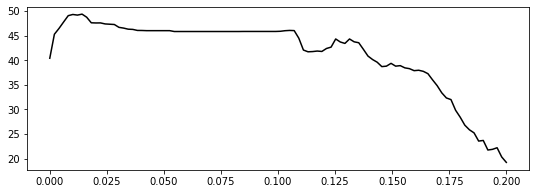

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3))
plt.plot(np.linspace(0, 0.2, num=100),tau*100, color='k');
#plt.axvline(7, 0, .95, color='k', linestyle='dashed', linewidth=1);

# PD of true density and k-nn density
## k-nn density

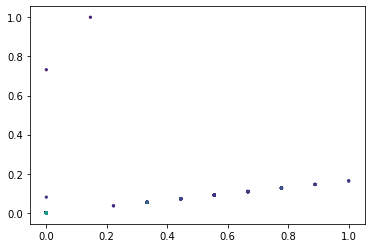

Computing underlying neighborhood graph :  0.042095196999980544 seconds
Sorting points by density :  0.0006378709999808052 seconds
Computing persistence :  0.026791083000034632 seconds
[0.235 0.21  0.207 0.206 0.184 0.184 0.18  0.172 0.171 0.156 0.145 0.142
 0.14  0.131 0.129 0.128 0.125 0.122 0.117 0.114 0.114 0.113 0.106 0.104
 0.092 0.083 0.054 0.049 0.047 0.042 0.033 0.031 0.026 0.019 0.019 0.018
 0.018 0.015 0.015 0.014 0.013 0.012 0.01  0.01  0.009 0.008 0.008 0.007
 0.007 0.006 0.006 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003
 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]
tau :  0.02680750439702278
MERGES :  89
B_max :  31
main clusters :  10
ERROR: not all classes !!!


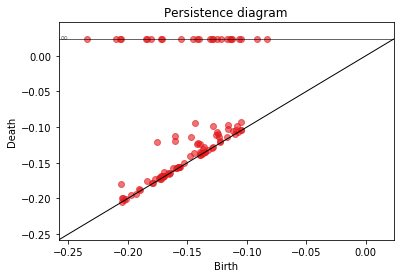

In [5]:
from fuzzy_clustering import Fuzzy_ToMATo 
from sklearn.neighbors import NearestNeighbors

num_pts = X.shape[0]
nbrs = NearestNeighbors(n_neighbors=int(num_pts/10), n_jobs=-1).fit(X)
dist_, idx_ = nbrs.kneighbors()
density_ = 1/np.sqrt(np.mean(np.square(dist_), axis=1))
clst=Fuzzy_ToMATo(density=density_, dist=dist_, idx=idx_, y=y, m = .09, rad=23, n_clusters=10, verbose=True)
clst.fit(X)

## PD of true density estimator

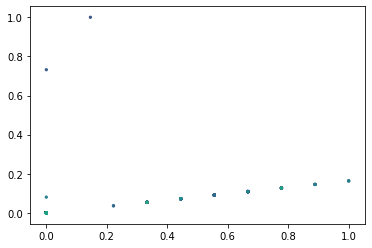

Computing underlying neighborhood graph :  0.05192037699998764 seconds
Sorting points by density :  0.0007349889999659354 seconds
Computing persistence :  0.12718330799998512 seconds
[0.12  0.116 0.116 0.104 0.017 0.016 0.013 0.012 0.008 0.008 0.007 0.005
 0.004 0.004 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001]
tau :  0.008385760663904548
MERGES :  20
B_max :  7
main clusters :  7
ERROR: not all classes !!!


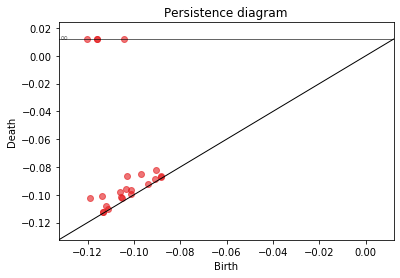

In [13]:
from fuzzy_clustering import Fuzzy_ToMATo 
from sklearn.neighbors import NearestNeighbors

num_pts = X.shape[0]
nbrs = NearestNeighbors(n_neighbors=int(num_pts/2), n_jobs=-1).fit(X)
dist_, idx_ = nbrs.kneighbors()
density_ = 1/np.sqrt(np.mean(np.square(dist_), axis=1))
clst=Fuzzy_ToMATo(density=density_, dist=dist_, idx=idx_, y=y, m = .09, rad=22, n_clusters=10, verbose=True)
clst.fit(X)

Computing density estimator
[0.094 0.095 0.1   ... 1.082 1.085 1.098] [1 1 1 ... 1 1 1]


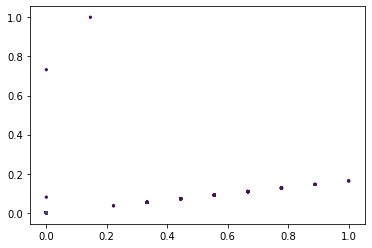

Computing underlying graph
radius = 9.457296716263208
Sorting points by density
Computing tau
tau = 0.10113742337547627
n_clusters = 2
Applying UF sequentially


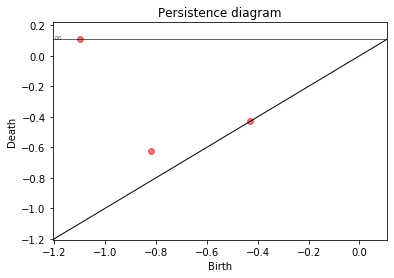

In [4]:
from clustering import ToMATo 
# Rips
clst=ToMATo(verbose=True)
clst.fit(X)